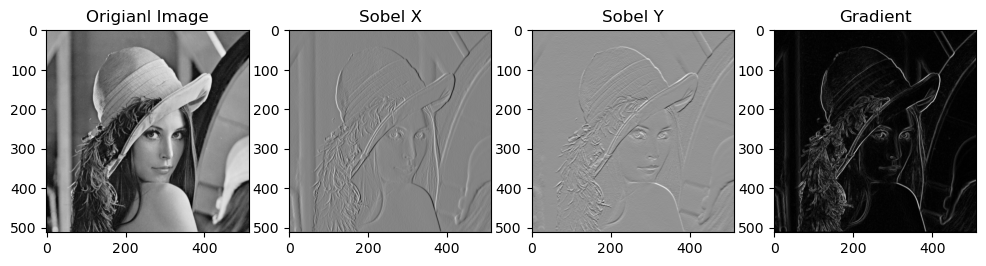

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def apply_sobel(image):
    # 소벨 마스크 정의
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)

    # 그래디언트 계산을 위한 배열 초기화
    gradient_x = np.zeros_like(image, dtype=np.float32)
    gradient_y = np.zeros_like(image, dtype=np.float32)

    # 이미지 크기
    rows, cols = image.shape

    # 소벨 연산 적용
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            gx = np.sum(sobel_x * image[i-1:i+2, j-1:j+2])
            gy = np.sum(sobel_y * image[i-1:i+2, j-1:j+2])
            gradient_x[i, j] = gx
            gradient_y[i, j] = gy

    return gradient_x, gradient_y

# 이미지 파일 경로를 입력하세요.
image_path = './image/lena.bmp'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 그래디언트 계산
gradient_x, gradient_y = apply_sobel(image)

# 그래디언트 강도 계산
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title('Origianl Image')
plt.subplot(1, 4, 2), plt.imshow(gradient_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 4, 3), plt.imshow(gradient_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 4, 4), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient')
plt.show()
